In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
#fetchimg data into variables
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.drop(columns=['Unnamed: 0'])

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#as we drop index column because it just kind of id which have no effect on dataset
df.drop('index',inplace=True,axis=1)

KeyError: "['index'] not found in axis"

In [ ]:
df.head()

In [5]:
#checking the total rows and total columns
df.shape

(16468, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [8]:
#Extract the month from DOB into seperate column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0


In [9]:
#Extract the date from DOB into seperate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0
1,1.0,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0
2,2.0,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0
3,3.0,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0
4,4.0,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0


In [10]:
#checking the value counts of each date
df.Date.value_counts()

22.0    88
15.0    86
4.0     80
5.0     75
3.0     66
29.0    58
2.0     57
19.0    56
26.0    55
20.0    53
13.0    53
25.0    52
27.0    52
18.0    51
7.0     50
11.0    49
10.0    48
1.0     47
8.0     46
17.0    43
24.0    42
31.0    37
6.0     37
14.0    36
21.0    35
12.0    34
28.0    33
9.0     25
16.0    25
30.0    24
23.0    24
Name: Date, dtype: int64

In [11]:
#checking the value counts of each type
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [12]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.967689
Total Bags,0.967689,1.000000


In [13]:
#checking the average year of volume of avocado per year
df.groupby('year')['Total Volume'].mean()

year
2015.0    1.610065e+06
2016.0    1.559787e+06
Name: Total Volume, dtype: float64

In [14]:
#checking the organic type of avocado
organic = df[df['type'] == 'organic']
organic

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month


In [15]:
#checking the mean of price at each year of organic type of avocado
organic.groupby('year')['Averageprice'].mean()

KeyError: 'Column not found: Averageprice'

In [16]:
#finding how much type of avocado is sell in last 4 years
df.groupby('year')['Total Volume'].count()

year
2015.0    1270
2016.0     247
Name: Total Volume, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   float64
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
 14  Month         1517 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.9+ MB


<AxesSubplot:>

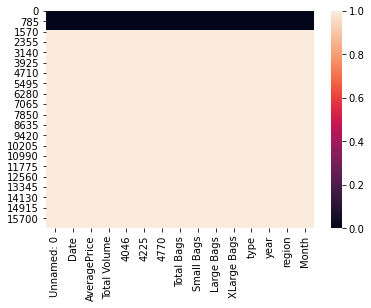

In [18]:
#checking the null values usina heatmap
sns.heatmap(df.isnull())

In [19]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,26.995386,15.253790,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558
std,14.848287,8.965902,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146
min,0.000000,1.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,14.000000,7.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,29.000000,15.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,39.000000,22.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,51.000000,31.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

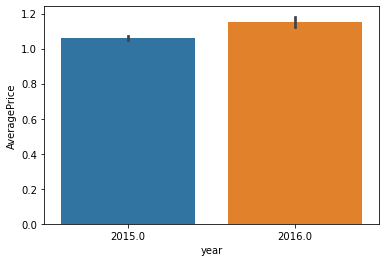

In [20]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice", data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

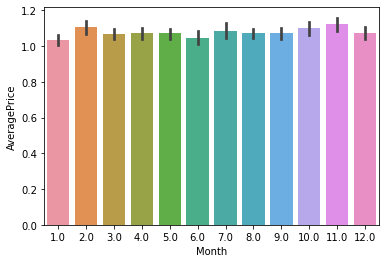

In [21]:
#checking the ratio of month and price taht which year has max average price
sns.barplot(x = "Month" , y = "AveragePrice", data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

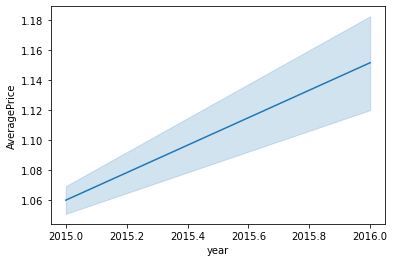

In [22]:
sns.lineplot(x = "year" , y = "AveragePrice", data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

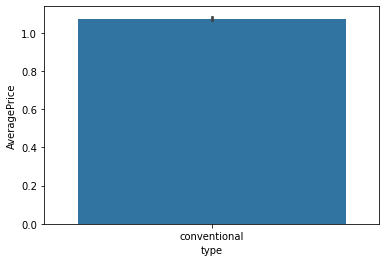

In [23]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice", data=df)

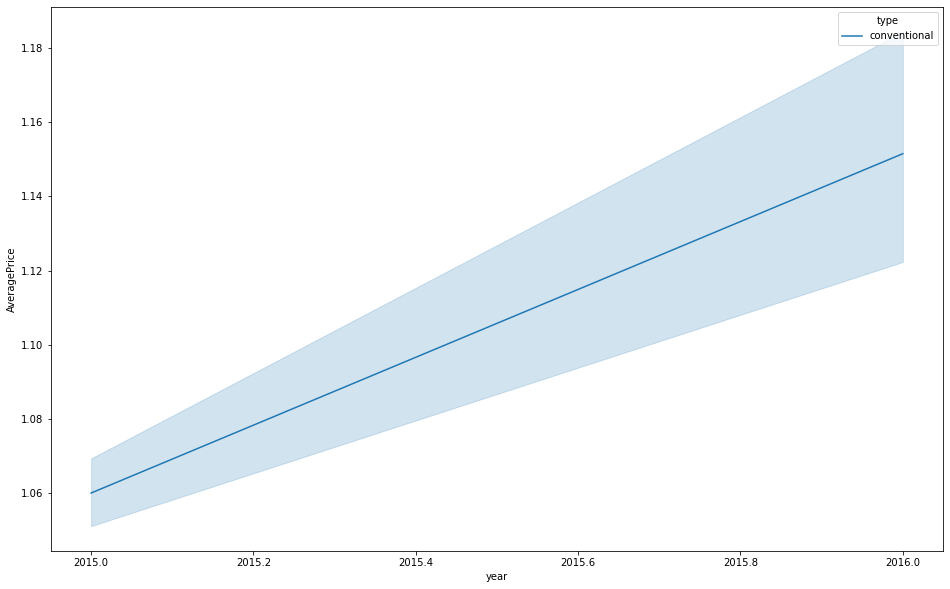

In [24]:
plt.figure(figsize=(16,10))
sns.lineplot(x = "year", y = "AveragePrice", hue='type', data=df)
plt.show()

Text(0.5, 1.0, 'ration of Price and Region')

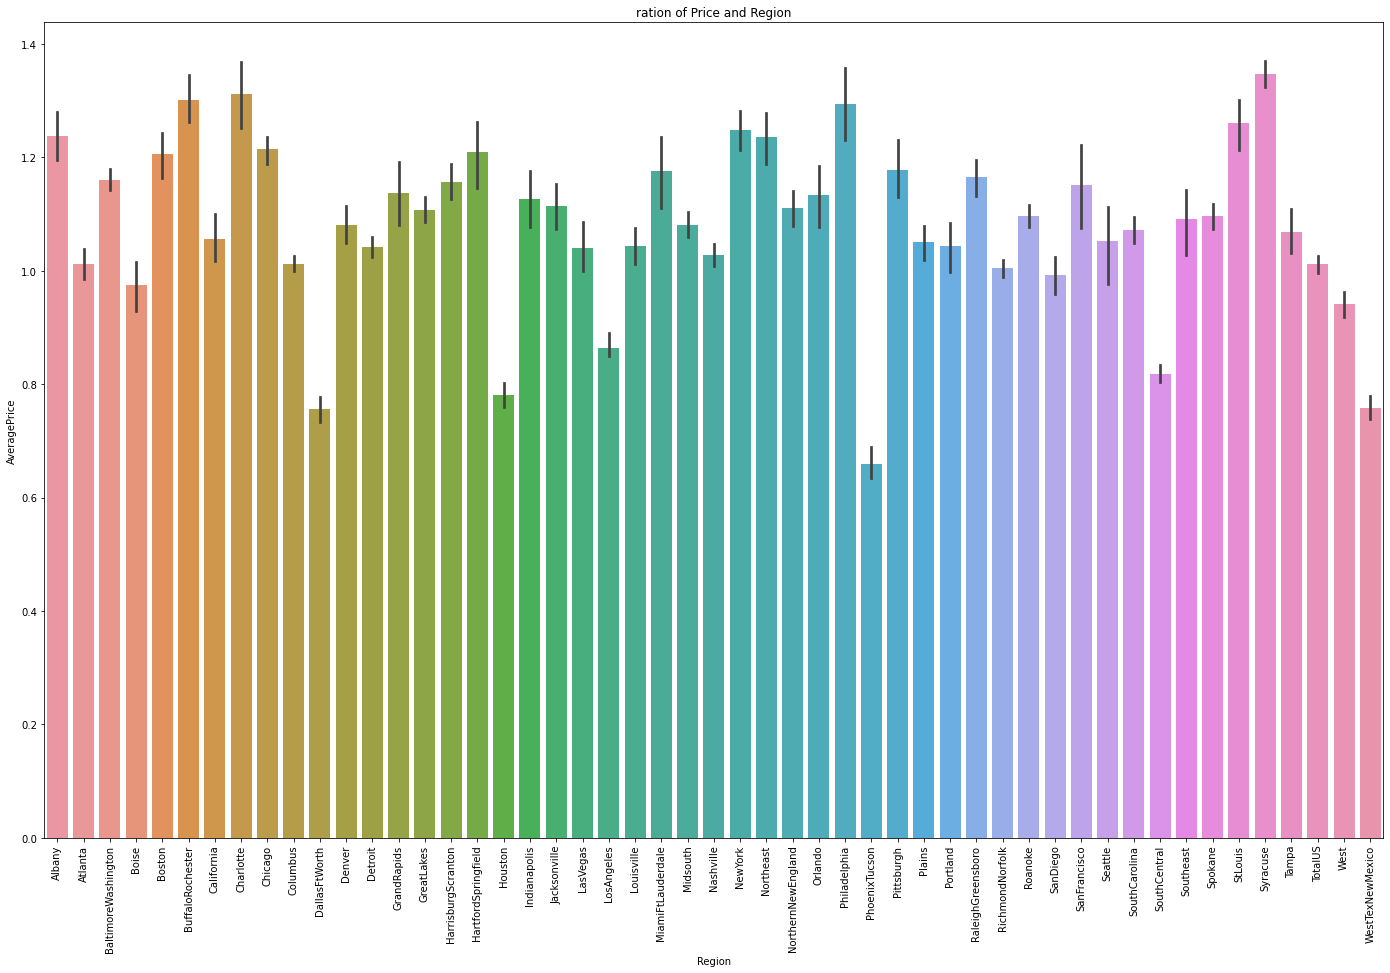

In [25]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('ration of Price and Region')

Text(0.5, 1.0, 'Average_Price')

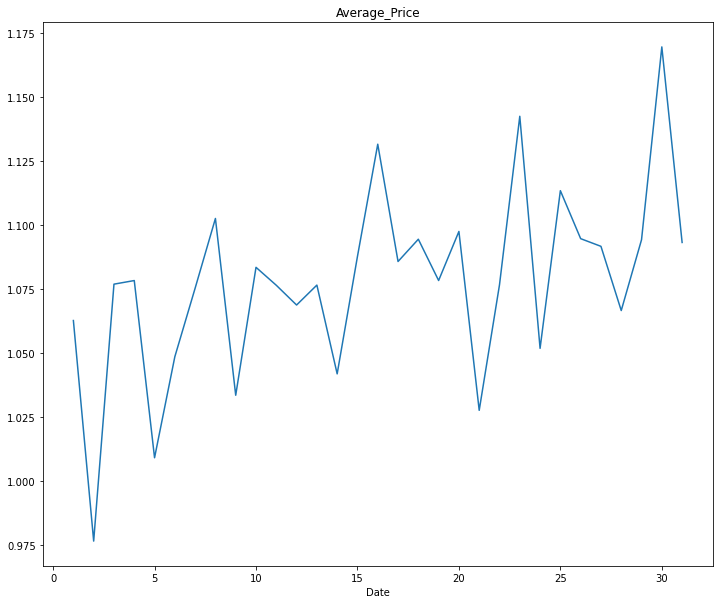

In [26]:
date=df.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

In [27]:
Month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
Month=['AveragePrice'].plot()
plt.title('Average_Price')

AttributeError: 'list' object has no attribute 'plot'

<Figure size 864x720 with 0 Axes>

In [ ]:
#plotting histogram for univariate analysis and checking the normal distribution
df.hist(figsize=(20,20),grid = True, layout = (4,4), bins = 30)

In [ ]:
df['type'].unique()

In [ ]:
#Making the categorial data into numerical for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))
    
print(df.dtypes)

In [ ]:
df.head()

In [ ]:
#plotting the boxplot each column to check the outliers
df.plot(kind='box',subplots = True,layout=(4,5),figsize=(15,10))

In [ ]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

[]

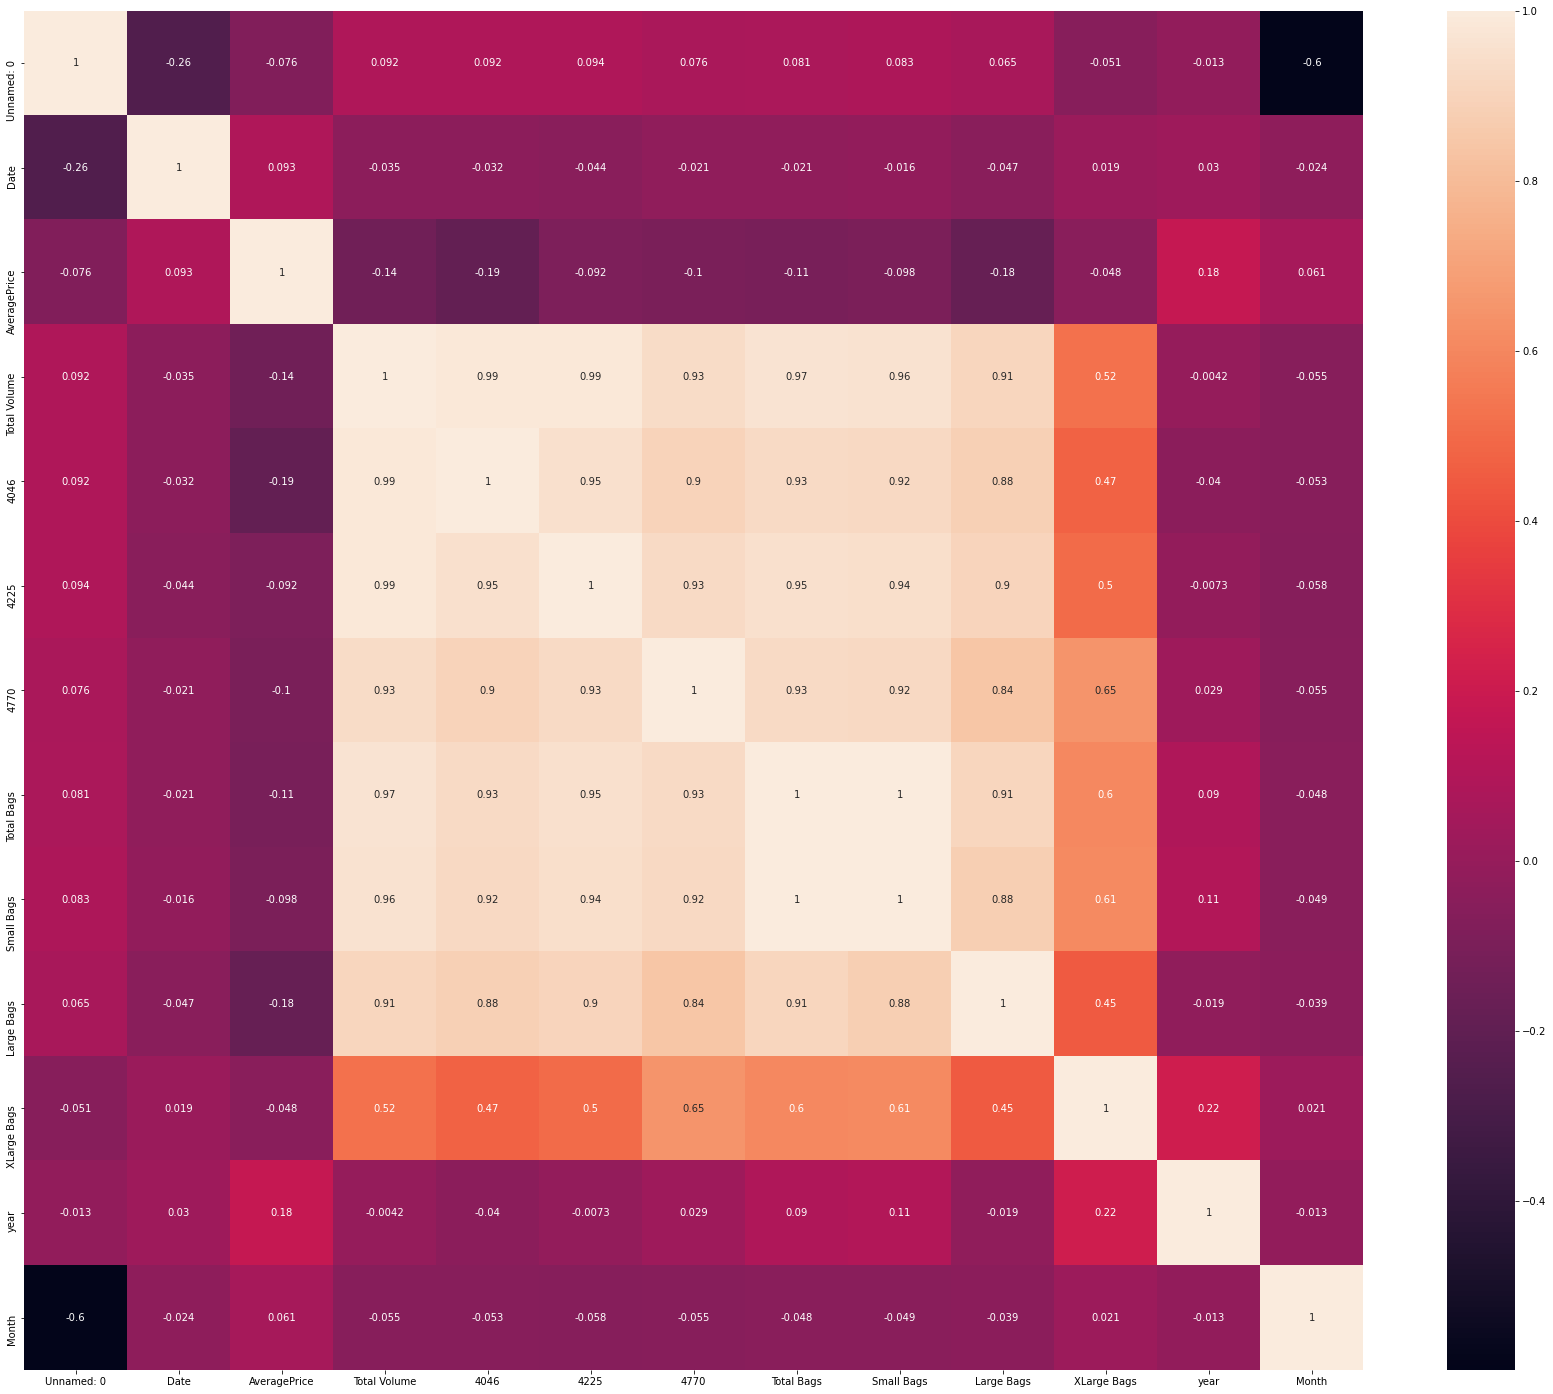

In [28]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [ ]:
threshold = 3
print(np.where(z<3))
print(df.shape)

In [ ]:
#Assign the value to df_new which are less than threshold value and removing outliers
df_new = df[(z<3).all(axis = 1)]

In [ ]:
print(df.shape)
print(df_new.shape)
df = df_new
print('shape after removing outliers',df.shape)

In [ ]:
#now finding the mean value of each column
print(df['PLU_4225'].mean())
print(df['Total Bags'].mean())
print(df['small Bags'].mean())

In [ ]:
#replace the outlier value to its mean value to remove outliers
df.loc[df['PLU_4225']<3,'PLU_4225'] = np.mean(df['PLU_4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small bags']<4,'Small Bags'] = np.mean(df['Small Bags'])

Unnamed: 0          AxesSubplot(0.125,0.71587;0.133621x0.16413)
Date             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AveragePrice      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4225               AxesSubplot(0.125,0.518913;0.133621x0.16413)
4770            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Total Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

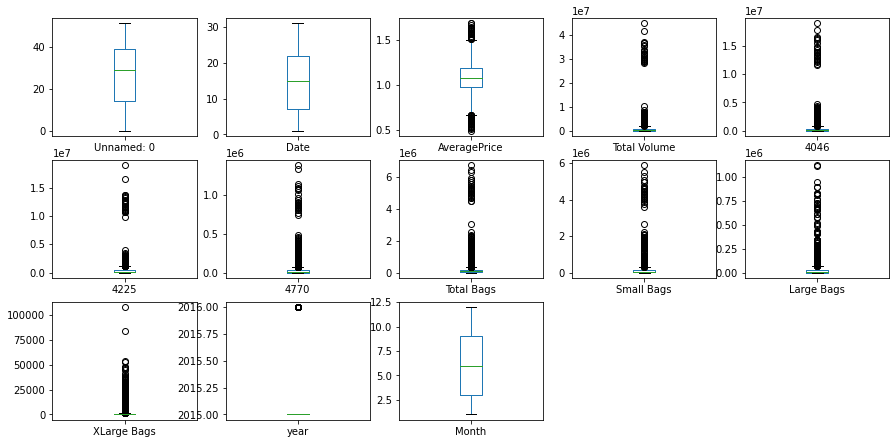

In [33]:
#Plotting the box plot of each column to check the outliers
df.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

In [34]:
print(df.shape)
print(df_new.shape)
df = df_new
print('shape after removing outliers',df.shape)

(16468, 15)


NameError: name 'df_new' is not defined

In [35]:
df.skew()

Unnamed: 0     -0.234824
Date            0.041303
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
dtype: float64

In [ ]:
#making the skew less than or equal to 0.55 for better prediction and plotting normal distribution
skew=('Total Volume','PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Xlarge Bags')
for col in skew :
    if df.skew().loc[col]>0.55
       df[col] = np.log1p(df[col])

In [36]:
df.skew()

Unnamed: 0     -0.234824
Date            0.041303
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
dtype: float64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

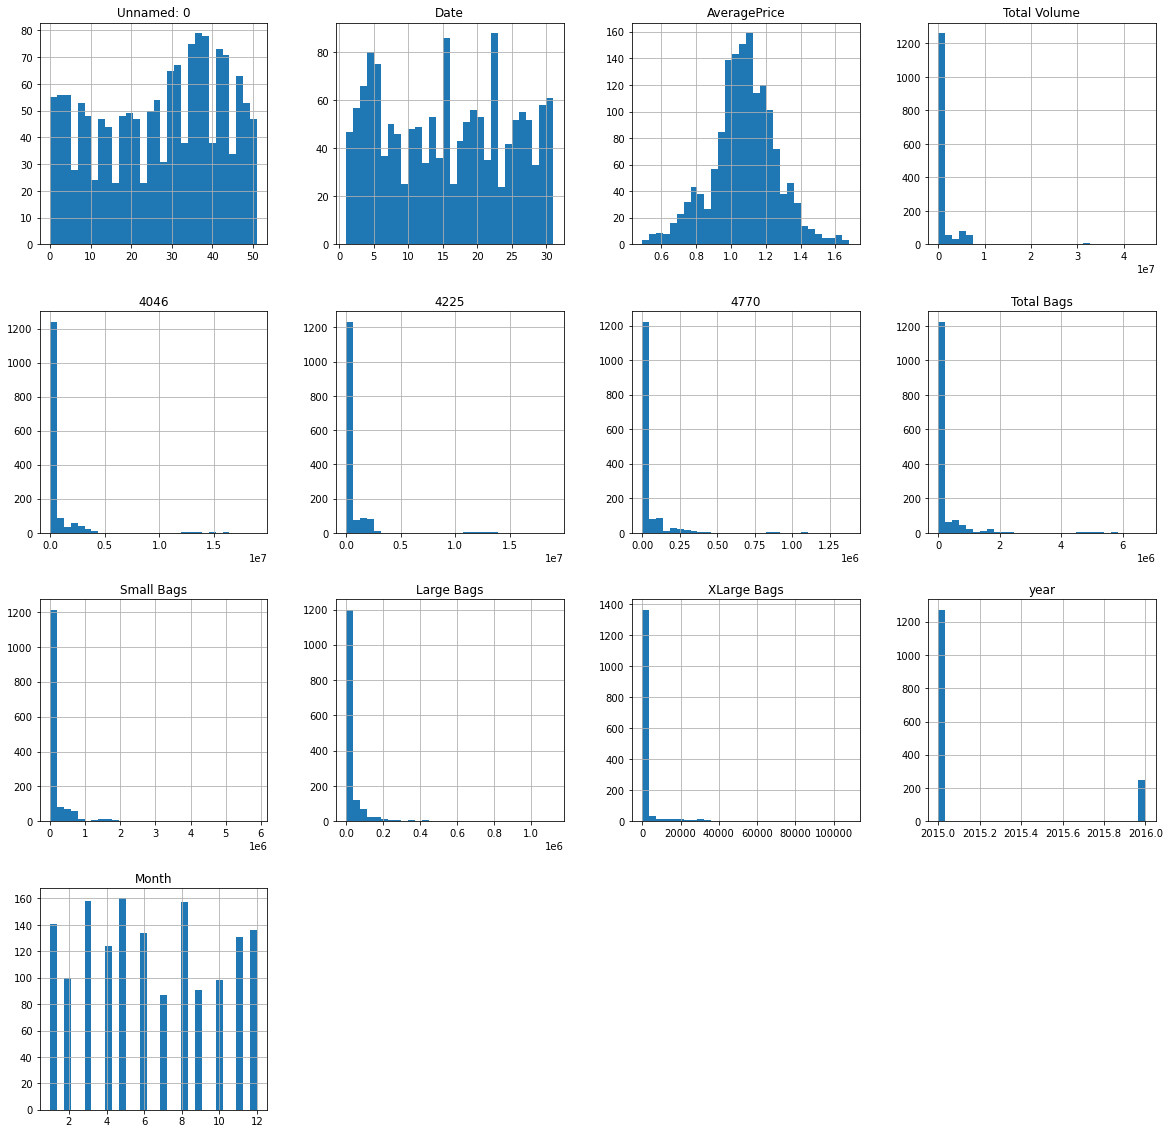

In [37]:
#plotting histograms for univariate analysis and checking teh normal distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30 )

In [38]:
#assign he values of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(16468, 13)
(16468, 1)


In [ ]:
#standardize the value of x so that mean will 0 and SD will become 1, and make data as normal distrubutor
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [ ]:
#now using multiple algorithms we are calculating the best algo which suite best for our data set

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range (40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state ",r_state , "is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state", final_state , "is" , max_r2_score , "and model is",final_model)

In [ ]:
#checking the best parameter for prediction of KNeighborsRegressoralgo using GridsearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 80,test_size = 0.33)
KN = KNeighborsRegressor()
parameteres={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(LA, parameters)
gridsearch.fit(train_x,train_y)
grdisearch.best_params

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :" ,r2_sc*100)

In [ ]:
print('Mean Absolute Error: ',mean_absolute_error(test_y,pred))
print('Mean Squared Error: ',mean_squared_error(test_y,pred))
print('Root Mean Absolute Error ',np.sqrt(mean_absolute_error(test_y,pred)))

In [46]:
#checking teh diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel(('Predicted_Y'))

NameError: name 'pred' is not defined

In [52]:
#importing libraries for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [54]:
#assign the values of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(16468, 13)
(16468, 1)


In [ ]:
#standardize the value of x so that mean will be 0 and SD will become 1,  and make the data as normal distributor
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [56]:
#NOW USING MULTIPLE ALGORITHMS  WE CALCULATE THEBEST ALGO WHICH SUIT BEST FOR OOR DATA SET

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,prec_c)
        print("accuracy score correspond to random state ",r_state, "is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " , final_state , "is" , max_accuracy_score , "and model is", final_model)

SyntaxError: invalid syntax (<ipython-input-56-f5d1f819470c>, line 12)

In [ ]:
#checking best parameter for prediction of KNeighborclassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridearch.best_params_

In [ ]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

In [ ]:
#calculating scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ', score.mean()*100)
print('STD score       : ', score.std())

In [ ]:
pred_prob = KNC.predict_proba(test_xc)[;,1]
pred_prob

In [ ]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [ ]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

NameError: name 'fpr' is not defined

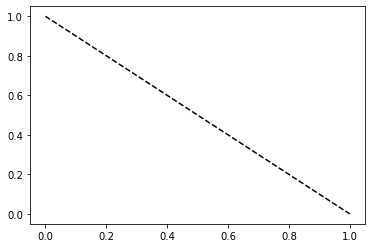

In [4]:
#plotting the graph which gives about the area under curve , more than the areaunder curve morewill be beter prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [ ]:
#save the model
joblib.dump(KNN, 'Project_8.obj')